In [1]:
import cv2
import numpy as np
import math
import copy
from matplotlib import pyplot as plt

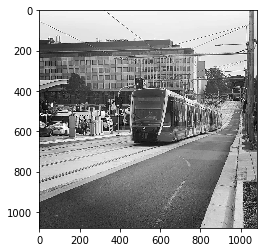

In [2]:
#Task 1
#img is the COLOR_BGR image
#img_I is the GRAY image
img = cv2.imread('light_rail.jpg',1)
#img_I = cv2.imread('test_big.jpg', cv2.IMREAD_GRAYSCALE)
#Split the img to B,G,R
imgB,imgG,imgR = cv2.split(img)

#As requested, use the OpenCV function to add the difference weight color image to img_I
img_I = cv2.addWeighted(imgR,0.299,imgG,0.587,0)
img_I = cv2.addWeighted(img_I,1,imgB,0.114,0)

#rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#for i in range(rgb_img.shape[0]):
    #for j in range(rgb_img.shape[1]):
        #img_I[i,j] = 0.299 * rgb_img[i,j][0] + 0.587 * rgb_img[i,j][1] +  0.114 * rgb_img[i,j][2]
cv2.imwrite('res1_rail.jpg',img_I)
#cv2.imshow('image',img_I)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img_I,'gray')

In [ ]:
#Task 2
#img_I is the GRAY image
#img_J is the new image which all pixel value is zero
#reflect_img is the padding image of the img_I which use the reflect as the padding way
img_I = cv2.imread('res1_dog.jpg',cv2.IMREAD_GRAYSCALE)
img_J = np.zeros(img_I.shape[:2], np.uint8)
reflect_img = cv2.copyMakeBorder(img_I,30,30,30,30,cv2.BORDER_REFLECT)
#size_of_mask is the size of the window and window is the square in this task
#distance is the distance from the chosen pixel to the edge
size_of_mask = 5
distance = int((size_of_mask-1)/2)

#The function
for i in range(30,reflect_img.shape[0] - 30):
    for j in range(30,reflect_img.shape[1] - 30):
        #ROI Intercept the area inside the window
        ROI = reflect_img[(i - distance):(i + distance + 1), (j - distance):(j + distance + 1)]
        
        # Use cv2.calcHist to statistics within the area
        hist=cv2.calcHist([ROI],[0],None,[256],[0,256])
        
        #Convert to list and operate with max and index
        list_hist = hist.tolist()
        img_J[i-30, j-30] = list_hist.index(max(list_hist))
        
plt.subplot(2,2,1),plt.imshow(img_J,'gray')
plt.subplot(2,2,2),plt.hist(img_J.ravel(),256,[0,256])
plt.subplot(2,2,3),plt.imshow(img_I,'gray')
plt.subplot(2,2,4),plt.hist(img_I.ravel(),256,[0,256])

cv2.imwrite('res2_dog_5x5.jpg',img_J,[int(cv2.IMWRITE_JPEG_QUALITY),100])
#print(array_img)
#print(list_hist)

#cv2.imshow('img_J', img_J)
#cv2.waitKey(0)
#cv2.destroyAllWindows() 
plt.show()

In [ ]:
#Task 3
#img_G is the original image
#img_J is the result of the task 2 and operated with the same window size
#reflect_imgG and reflect_imgJ is the padding image which pad 30 pixel in four directions using the reflect way
#img_B is the copy of the img_G and also the result of the task 3
img_G =cv2.imread('dog.jpg',1)
img_J =cv2.imread('res2_dog_5x5.jpg',cv2.IMREAD_GRAYSCALE)
reflect_imgG = cv2.copyMakeBorder(img_G,30,30,30,30,cv2.BORDER_REFLECT)
reflect_imgJ = cv2.copyMakeBorder(img_J,30,30,30,30,cv2.BORDER_REFLECT)
img_B =copy.deepcopy(img_G)

#The same window size as task 2
size_of_mask = 5
distance = int((size_of_mask-1)/2)

#The function
for i in range(30,reflect_imgJ.shape[0] - 30):
    for j in range(30,reflect_imgJ.shape[1] - 30):
        #graySum is the sum of same pixel value's B, G, R in each window
        #number is the number of same pixel value in each window
        graySum = [0,0,0]
        number = 0
        #For each window
        for m in range(- distance, distance + 1):
            for n in range( - distance, distance + 1):
                #Judge whether the current pixel has the same value as the center pixel
                if reflect_imgJ[i + m, j + n] == reflect_imgJ[i, j]:
                    graySum += reflect_imgG[i + m,j + n]
                    number += 1
        #Calculate the average b,g,r and assign values to the corresponding points in img_B
        (b,g,r) = (int(graySum[0]/number),int(graySum[1]/number),int(graySum[2]/number))
        img_B[i - 30, j - 30] = (b,g,r)
        
cv2.imwrite('res3_dog_5x5.jpg',img_B)
#cv2.imshow(img_B)
#cv2.waitKey(0)
#cv2.destroyAllWindows()   